<a href="https://colab.research.google.com/github/DC769/My-UG-Projects/blob/main/Inter_IIT_2023_selection_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy matplotlib seaborn



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


aapl_data = pd.read_csv('/content/AAPLstockdata5y.csv')
msft_data = pd.read_csv('/content/MSFTstockdata5y.csv')



In [ ]:
def pairs_trading_strategy(aapl_data, msft_data, z_score_threshold=2.0):

    spread = aapl_data['Close'] - msft_data['Close']


    z_score = (spread - np.mean(spread)) / np.std(spread)


    aapl_position = 0
    msft_position = 0
    pnl = []

    for i in range(1, len(aapl_data)):
        if z_score[i] > z_score_threshold:
            aapl_position -= 1
            msft_position += aapl_data['Close'][i] / msft_data['Close'][i]
        elif z_score[i] < -z_score_threshold:
            aapl_position += 1
            msft_position -= aapl_data['Close'][i] / msft_data['Close'][i]
        else:
            aapl_position = 0
            msft_position = 0


        daily_pnl = (aapl_position * aapl_data['Close'][i]) + (msft_position * msft_data['Close'][i])
        pnl.append(daily_pnl)

    return pnl

Win Rate: 48.39%
Loss Rate: 51.61%
Average Win Amount: 122.27
Average Loss Amount: -14.60


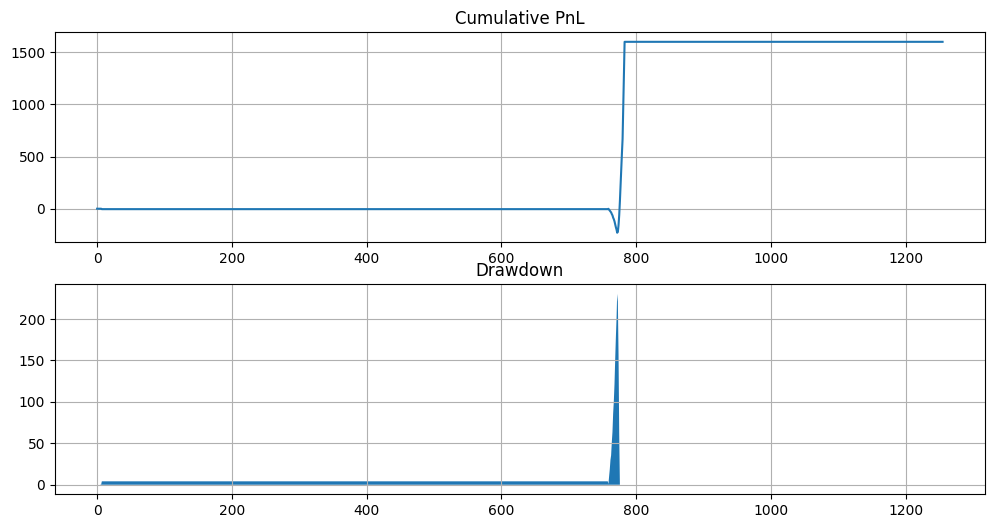

In [ ]:
pnl = pairs_trading_strategy(aapl_data, msft_data)


winning_trades = sum(1 for x in pnl if x > 0)
losing_trades = sum(1 for x in pnl if x < 0)
average_win = sum(x for x in pnl if x > 0) / winning_trades if winning_trades > 0 else 0
average_loss = sum(x for x in pnl if x < 0) / losing_trades if losing_trades > 0 else 0

cumulative_pnl = np.cumsum(pnl)
drawdown = np.maximum.accumulate(cumulative_pnl) - cumulative_pnl


plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(cumulative_pnl)
plt.title('Cumulative PnL')
plt.grid()

plt.subplot(2, 1, 2)
plt.fill_between(range(len(drawdown)), drawdown)
plt.title('Drawdown')
plt.grid()


print(f"Win Rate: {winning_trades / (winning_trades + losing_trades):.2%}")
print(f"Loss Rate: {losing_trades / (winning_trades + losing_trades):.2%}")
print(f"Average Win Amount: {average_win:.2f}")
print(f"Average Loss Amount: {average_loss:.2f}")